# Hidden Markov Chains

In [9]:
from utilities.std_imports import *
import seaborn as sns
from hmmlearn.hmm import GaussianHMM

### Load data
Annual flow data for the Colorado River 

In [29]:
flow = np.array([15.9, 15.4, 15.7, 15.9, 15.5, 16, 15.3, 15.7, 15.9, 15.8, 15.4, 15.8, 15.8, 15.6, 15.7, 15.6, 15.4, 15.7, 15.7, 15.7, 15.8, 15, 15.7, 15.5, 14.9, 15.4, 15.6, 15.3, 15.8, 15.1, 15.5, 15.6, 15.4, 15.4, 15.4, 15.3, 15.6, 15.5, 15.5, 15.4, 15.4, 15.9, 14.8, 15.2, 15.3, 16, 15.2, 15.3, 15.2, 15.8, 15, 15.8, 15, 15.8, 15.3, 15.6, 15.5, 15.6, 14.7, 15.7, 15.6, 15.1, 16.1, 16.2, 16.1, 16, 15.6, 15.2, 15, 15.2, 15.3, 15.8, 15.9, 15.9, 15.7, 15.6, 15.4, 15.2, 15, 14.6, 15.2, 15, 15.6, 15.4, 15.8, 15.6, 15.4, 15, 14.9, 15.1])
flow = np.reshape(flow,[len(flow),1])
log_flow = np.log(flow)
log_flow

array([[2.76631911],
       [2.73436751],
       [2.75366071],
       [2.76631911],
       [2.74084002],
       [2.77258872],
       [2.72785283],
       [2.75366071],
       [2.76631911],
       [2.76000994],
       [2.73436751],
       [2.76000994],
       [2.76000994],
       [2.74727091],
       [2.75366071],
       [2.74727091],
       [2.73436751],
       [2.75366071],
       [2.75366071],
       [2.75366071],
       [2.76000994],
       [2.7080502 ],
       [2.75366071],
       [2.74084002],
       [2.70136121],
       [2.73436751],
       [2.74727091],
       [2.72785283],
       [2.76000994],
       [2.71469474],
       [2.74084002],
       [2.74727091],
       [2.73436751],
       [2.73436751],
       [2.73436751],
       [2.72785283],
       [2.74727091],
       [2.74084002],
       [2.74084002],
       [2.73436751],
       [2.73436751],
       [2.76631911],
       [2.69462718],
       [2.72129543],
       [2.72785283],
       [2.77258872],
       [2.72129543],
       [2.727

### Fit model and predict
Classify each observation as state 0 or 1 (dry or wet year)

In [30]:
model = GaussianHMM(n_components=2, n_iter=1000).fit(flow)
hidden_states = model.predict(flow)
hidden_states

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0])

Retrieve model means, vars and transmat 

In [36]:
means = np.array(model.means_)
vars = np.array(np.sqrt(np.array([np.diag(model.covars_[0]),np.diag(model.covars_[1])])))
P = np.array(model.transmat_)
means, vars, P

(array([[15.26154145],
        [15.69236907]]),
 array([[0.29104705],
        [0.22666428]]),
 array([[0.63091519, 0.36908481],
        [0.35048575, 0.64951425]]))

In [38]:
# find log-likelihood of Gaussian HMM
logProb = model.score(flow)
round(logProb,2)

-26.79

Generate samples applying HMM

In [45]:
nSamples=100
samples = model.sample(nSamples)
samples[0][:10], samples[1][:10]

(array([[15.60264226],
        [15.41509232],
        [14.98816084],
        [15.03661251],
        [15.65980094],
        [14.9739898 ],
        [15.78913322],
        [15.72890037],
        [15.83165875],
        [15.90218526]]),
 array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1]))

Re-organize parameters so that first row is lower mean 

In [46]:
if means[0] > means[1]:
    means = np.flipud(mus)
    vars = np.flipud(vars)
    P = np.fliplr(np.flipud(P))
    hidden_states = 1 - hidden_states

### Plot states

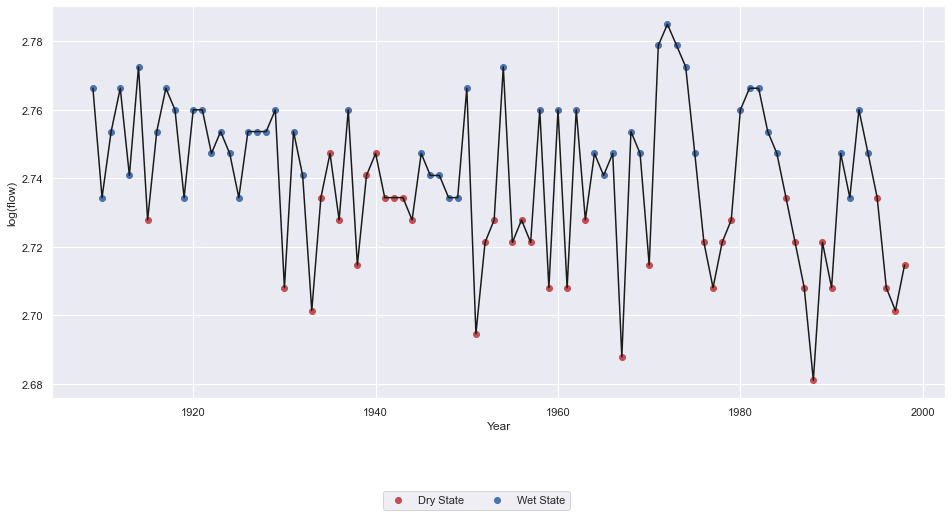

In [47]:
sns.set()
fig = plt.figure(figsize=[16,8])
ax = fig.add_subplot(111)

xs = np.arange(len(log_flow)) + 1909
masks = hidden_states == 0
ax.scatter(xs[masks], log_flow[masks], c='r', label='Dry State')
masks = hidden_states == 1
ax.scatter(xs[masks], log_flow[masks], c='b', label='Wet State')
ax.plot(xs, log_flow, c='k')

ax.set_xlabel('Year')
ax.set_ylabel('log(flow)')
fig.subplots_adjust(bottom=0.2)
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, frameon=True);




### Credits & Links

https://waterprogramming.wordpress.com/2018/07/03/fitting-hidden-markov-models-part-ii-sample-python-script/  